In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from mnist import train_images, test_images, train_labels, test_labels
import numpy as np
from scipy.misc import imresize
import math
from collections import namedtuple
from functools import partial

np.seterr(all='raise')
pass

In [2]:
class nnClassifier():
    
    def __init__(self, h, ll):
        self.sigma = lambda x : (1 + np.exp(-x)) ** (-1)
        self.h = h
        self.ll = ll

    def fit(self, x, y):
        n = x.shape[1]
        m = y.shape[1]
        l = x.shape[0]
        x = np.append(-1 * np.ones((x.shape[0], 1)), x, axis=1)
        
        w0 = (np.random.random((n + 1, self.h)) - 0.5) / n
        w1 = (np.random.random((self.h + 1, m)) - 0.5) / m
        q = l / 10.0
        EPS = 1e-5

        iteration = 0
        while True:
            i = np.random.randint(l)
            u = np.append(-1, self.sigma(x[i].dot(w0)))
            a = self.sigma(u.dot(w1))
            eps1 = a - y[i]
            q_i = np.sum(eps1 * eps1)
            
            eps0 = w1.dot(eps1 * a * (1 - a))
            
            w1 -= self.ll * np.outer(u,    eps1 * a * (1 - a))
            w0 -= self.ll * np.outer(x[i], np.delete(eps0 * u * (1 - u), 0, 0))
            new_q = (l - 1) / l * q + q_i / l
            
            if abs(new_q - q) < EPS:
                break
            iteration += 1
            if iteration % 30000 == 0:
                print(iteration, q)
            q = new_q
            
        self.w0 = w0
        self.w1 = w1

    def predict(self, point):
        u = self.sigma(np.append(-1, point).dot(self.w0))
        a = self.sigma(np.append(-1, u).dot(self.w1))
        return a

In [3]:
class mnistAdapter():
    def __init__(self, classifier):
        self.classifier = classifier
        
    def fit(self, x, y):
        x_my = x.reshape((x.shape[0], -1)).astype(np.float) / 255
        y_my = np.identity(10)[y]
        self.classifier.fit(x_my, y_my)
        
    def predict(self, point):
        point_my = point.reshape((-1)).astype(np.float) / 255
        return np.argmax(self.classifier.predict(point_my))

In [4]:
mnistNN = mnistAdapter(nnClassifier(300, 1))
mnistNN.fit(train_images(), train_labels())

30000 3639.30201732
60000 2207.37068285
90000 1338.8597342
120000 812.07955321
150000 492.570387412
180000 298.777233219
210000 181.235244462
240000 109.941617515
270000 66.6991483726
300000 40.4703545382
330000 24.5605282478
360000 14.911035859
390000 9.05686332488
420000 5.50561523563
450000 3.35004981761


In [5]:
test_predictions = np.array([mnistNN.predict(point) for point in test_images()])
wrong_answers = np.nonzero(test_predictions - test_labels())[0]
accuracy = 100 - len(wrong_answers) / len(test_images()) * 100

In [6]:
print(accuracy)

97.26


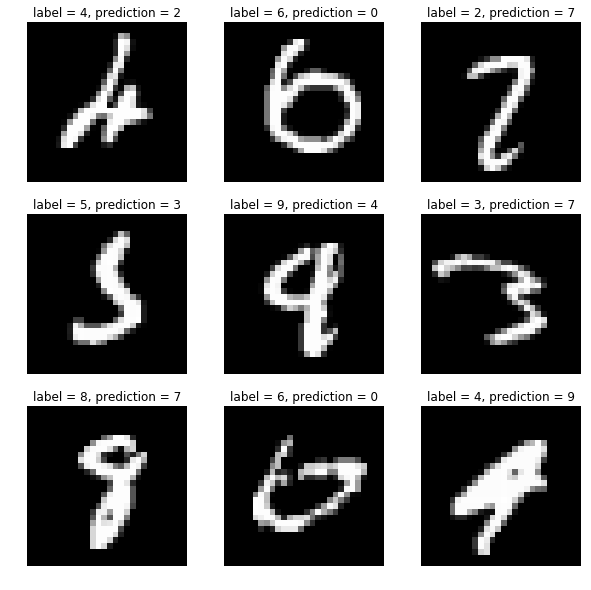

In [7]:
fig = plt.figure(figsize = (10, 10))
for i, wrong_i in zip(range(9), wrong_answers):
    subplot = fig.add_subplot(3, 3, i + 1)
    subplot.imshow(test_images()[wrong_i], cmap='gray')
    subplot.axis("off")
    subplot.set_title("label = {}, prediction = {}".format(test_labels()[wrong_i], test_predictions[wrong_i]))
plt.show()

In [8]:
digit = (1 - plt.imread("digit.png")) * 255
digit = imresize(digit, (28, 28))
mnistNN.predict(digit)

1